In [5]:
!unzip "/content/drive/MyDrive/Colab Notebooks/cats and dogs.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/cats and dogs.zip
   creating: cats and dogs/
  inflating: cats and dogs/.DS_Store  
  inflating: cats and dogs/._.DS_Store  
   creating: cats and dogs/train/
  inflating: cats and dogs/train/.DS_Store  
  inflating: cats and dogs/train/._.DS_Store  
   creating: cats and dogs/train/cats/
  inflating: cats and dogs/train/cats/cat.999.jpg  
  inflating: cats and dogs/train/cats/cat.995.jpg  
  inflating: cats and dogs/train/cats/cat.997.jpg  
  inflating: cats and dogs/train/cats/cat.994.jpg  
  inflating: cats and dogs/train/cats/cat.998.jpg  
  inflating: cats and dogs/train/cats/cat.991.jpg  
  inflating: cats and dogs/train/cats/cat.993.jpg  
  inflating: cats and dogs/train/cats/cat.889.jpg  
  inflating: cats and dogs/train/cats/cat.860.jpg  
  inflating: cats and dogs/train/cats/cat.89.jpg  
  inflating: cats and dogs/train/cats/cat.840.jpg  
  inflating: cats and dogs/train/cats/cat.832.jpg  
  inflating: cats and dogs/train/cats

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#data
import os

train_cats_dir = 'cats and dogs/train/cats'
train_dogs_dir = 'cats and dogs/train/dogs'

test_cats_dir = 'cats and dogs/test/cats'
test_dogs_dir = 'cats and dogs/test/dogs'

print('total train cat images:', len(os.listdir(train_cats_dir)))
print('total train dog images:', len(os.listdir(train_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total train cat images: 1002
total train dog images: 1000
total test cat images: 500
total test dog images: 500


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # its getting used to convert all the images into the array

train_dir = 'cats and dogs/train' # directory having training data
test_dir = 'cats and dogs/test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),# changing shape of all the images to 150,150
                                                    batch_size=32,
                                                    class_mode='binary') #categorical  as we have 2 classes

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
train_generator

In [11]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [12]:
import warnings
warnings.filterwarnings("ignore")

model1.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model1.fit_generator(train_generator,epochs=5)

Epoch 1/5
63/63 [==============================] - 11s 78ms/step - loss: 0.7050 - accuracy: 0.5155
Epoch 2/5
63/63 [==============================] - 3s 53ms/step - loss: 0.6906 - accuracy: 0.5385
Epoch 3/5
63/63 [==============================] - 3s 53ms/step - loss: 0.6746 - accuracy: 0.5784
Epoch 4/5
63/63 [==============================] - 4s 68ms/step - loss: 0.6483 - accuracy: 0.6299
Epoch 5/5
63/63 [==============================] - 3s 52ms/step - loss: 0.6328 - accuracy: 0.6479


In [13]:
test_loss, test_accuracy = model1.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

32/32 [==============================] - 2s 55ms/step - loss: 0.6563 - accuracy: 0.6420
0.6562830209732056
0.6420000195503235


## Image Augmentation

In [14]:
# Image Augmentation

train_datagen_augment = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator_augment = train_datagen_augment.flow_from_directory(train_dir,
                                                                    target_size=(150, 150),
                                                                    batch_size=32,
                                                                    class_mode='binary')

Found 2002 images belonging to 2 classes.


In [15]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer="rmsprop",metrics=['accuracy'])
model2.fit_generator(train_generator_augment,epochs=5)


Epoch 1/5
63/63 [==============================] - 15s 209ms/step - loss: 0.7132 - accuracy: 0.5150
Epoch 2/5
63/63 [==============================] - 13s 213ms/step - loss: 0.6928 - accuracy: 0.5230
Epoch 3/5
63/63 [==============================] - 14s 215ms/step - loss: 0.6899 - accuracy: 0.5320
Epoch 4/5
63/63 [==============================] - 14s 215ms/step - loss: 0.6882 - accuracy: 0.5380
Epoch 5/5
63/63 [==============================] - 15s 242ms/step - loss: 0.6738 - accuracy: 0.5894


In [16]:
test_loss, test_accuracy = model2.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

32/32 [==============================] - 2s 50ms/step - loss: 0.6541 - accuracy: 0.5850
0.6540889143943787
0.5849999785423279


## Using Pre-trained Model

### VGG 16

In [17]:
# VGG 16
from tensorflow.keras.applications import VGG16

In [18]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

vgg16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [19]:
model3 = Sequential()
model3.add(vgg16)
model3.add(Flatten())
model3.add(Dense(512, activation="relu"))
model3.add(Dense(1, activation='sigmoid'))

vgg16.trainable = False

In [20]:
model3.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model3.fit_generator(train_generator,epochs=5)

Epoch 1/5
63/63 [==============================] - 12s 110ms/step - loss: 0.6008 - accuracy: 0.7837
Epoch 2/5
63/63 [==============================] - 4s 67ms/step - loss: 0.1995 - accuracy: 0.9226
Epoch 3/5
63/63 [==============================] - 4s 69ms/step - loss: 0.1338 - accuracy: 0.9530
Epoch 4/5
63/63 [==============================] - 5s 72ms/step - loss: 0.0943 - accuracy: 0.9660
Epoch 5/5
63/63 [==============================] - 4s 68ms/step - loss: 0.0545 - accuracy: 0.9880


In [21]:
test_loss, test_accuracy = model3.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

32/32 [==============================] - 4s 111ms/step - loss: 0.2938 - accuracy: 0.8720
0.2938045561313629
0.871999979019165


In [22]:
# Freezing all layers upto a specific one
model4 = Sequential()
model4.add(vgg16)
model4.add(Flatten())
model4.add(Dense(256, activation="relu"))
model4.add(Dense(1, activation='sigmoid'))

vgg16.trainable = True

set_trainable = False
for layer in vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [23]:
model4.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model4.fit_generator(train_generator,epochs=5)

Epoch 1/5
63/63 [==============================] - 8s 85ms/step - loss: 0.9825 - accuracy: 0.5075
Epoch 2/5
63/63 [==============================] - 5s 85ms/step - loss: 0.6932 - accuracy: 0.4995
Epoch 3/5
63/63 [==============================] - 5s 83ms/step - loss: 0.6932 - accuracy: 0.4995
Epoch 4/5
63/63 [==============================] - 5s 85ms/step - loss: 0.6932 - accuracy: 0.4945
Epoch 5/5
63/63 [==============================] - 5s 84ms/step - loss: 0.6932 - accuracy: 0.5005


In [24]:
test_loss, test_accuracy = model4.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

32/32 [==============================] - 2s 69ms/step - loss: 0.6931 - accuracy: 0.5000
0.6931499242782593
0.5


### Resnet50

In [25]:
# resnet50
from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [26]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [27]:
model5 = Sequential()
model5.add(conv_base)
model5.add(Flatten())
model5.add(Dense(512, activation="relu"))
model5.add(Dense(1, activation='sigmoid'))

conv_base.trainable = False

In [28]:
model5.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model5.fit_generator(train_generator,epochs=5)

Epoch 1/5
63/63 [==============================] - 11s 81ms/step - loss: 1.1571 - accuracy: 0.5345
Epoch 2/5
63/63 [==============================] - 4s 71ms/step - loss: 0.6563 - accuracy: 0.6134
Epoch 3/5
63/63 [==============================] - 4s 70ms/step - loss: 0.6331 - accuracy: 0.6414
Epoch 4/5
63/63 [==============================] - 4s 67ms/step - loss: 0.6160 - accuracy: 0.6503
Epoch 5/5
63/63 [==============================] - 5s 76ms/step - loss: 0.6297 - accuracy: 0.6394


In [29]:
test_loss, test_accuracy = model5.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

32/32 [==============================] - 4s 88ms/step - loss: 0.6224 - accuracy: 0.6440
0.6224349737167358
0.6439999938011169


Testing Model

In [38]:
# Make predictions on unseen test data
predictions = model5.predict(test_generator)

32/32 [==============================] - 4s 85ms/step


In [39]:
# Function to plot images with predictions
def plot_images_with_predictions(images, labels, predictions, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), 9)):  # Displaying the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[int(labels[i])]}\nPred: {class_names[int(predictions[i] > 0.5)]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [40]:
# Load images and labels from the unseen test generator
images, labels = next(test_generator)
predicted_labels = predictions[:len(labels)]

In [41]:
# Class names
class_names = ['Cat', 'Dog']

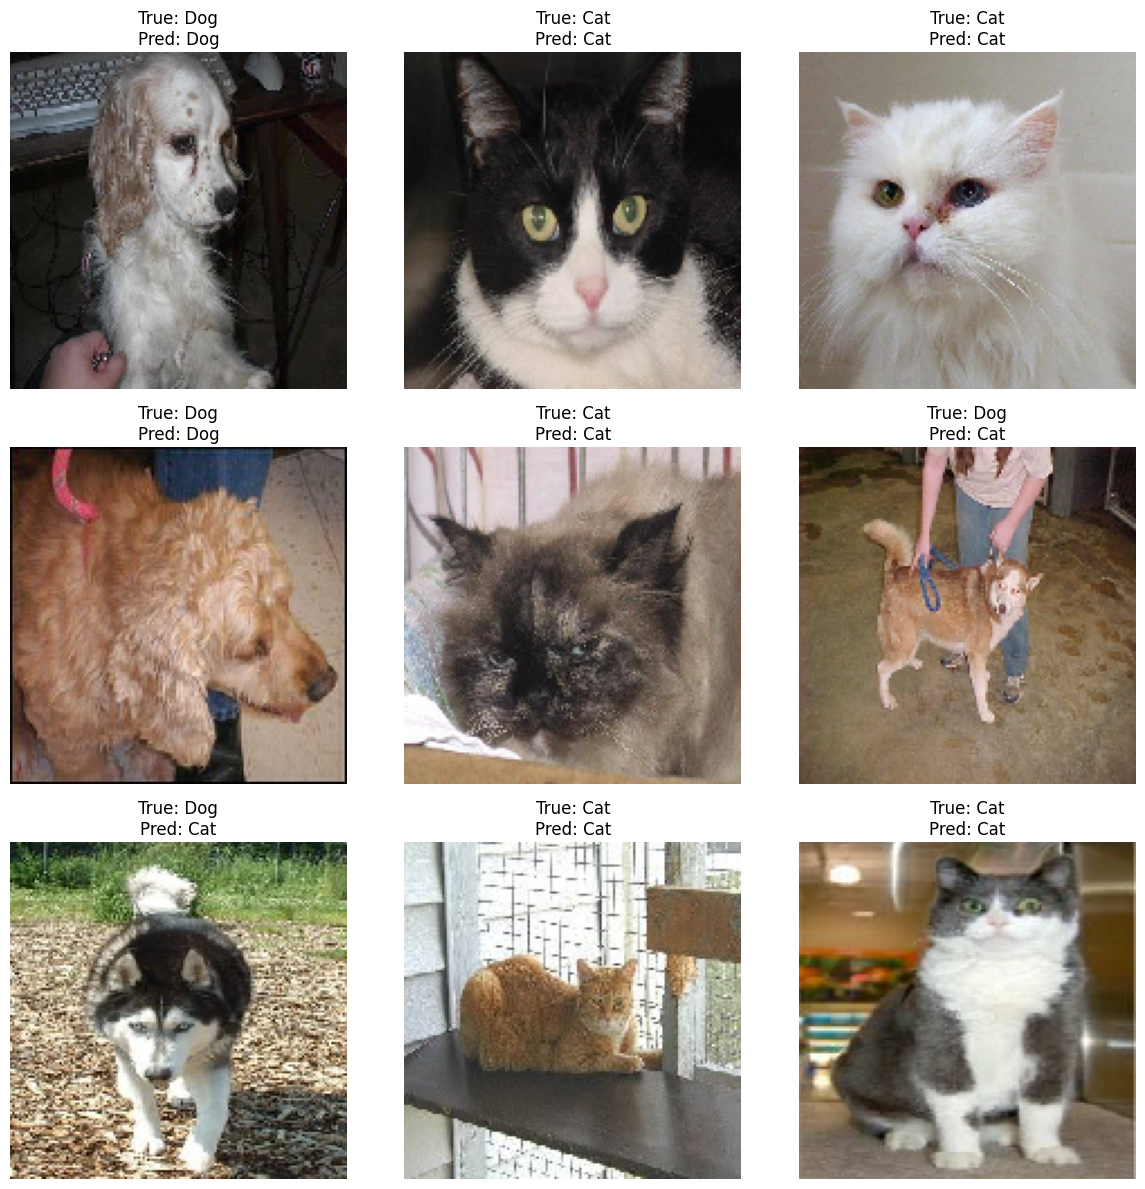

In [42]:
# Plot images with their predictions
plot_images_with_predictions(images, labels, predicted_labels, class_names)